# Basic Stock Data Manipulation

In [42]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd
import pandas_datareader as web

#style.use('ggplot')

In [43]:
start  = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [44]:
df = web.DataReader('TSLA',"yahoo",start,end)

In [45]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [46]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,208.000000,213.449997,207.710007,213.339996,213.339996,4662900
2016-12-27,214.880005,222.250000,214.419998,219.529999,219.529999,5915700
2016-12-28,221.529999,223.800003,217.199997,219.740005,219.740005,3782500
2016-12-29,218.559998,219.199997,214.119995,214.679993,214.679993,4035900
2016-12-30,216.300003,217.500000,211.679993,213.690002,213.690002,4642600


In [8]:
df.to_csv('tsla.cvs')

In [47]:
df2 = pd.read_csv('tsla.cvs',parse_dates=True,index_col=0)
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


<IPython.core.display.Javascript object>


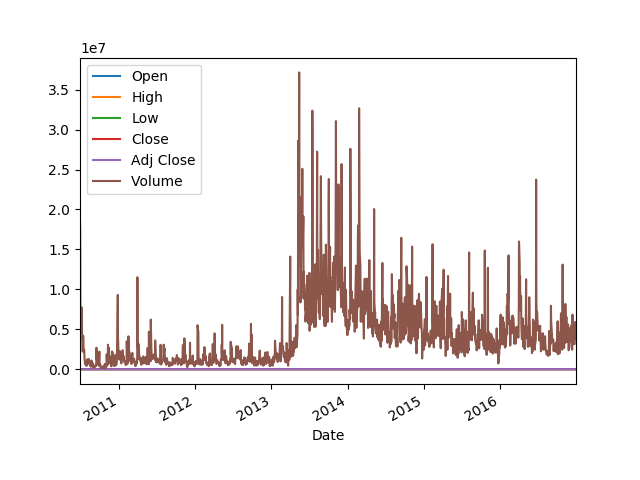

In [48]:
df.plot()

<IPython.core.display.Javascript object>


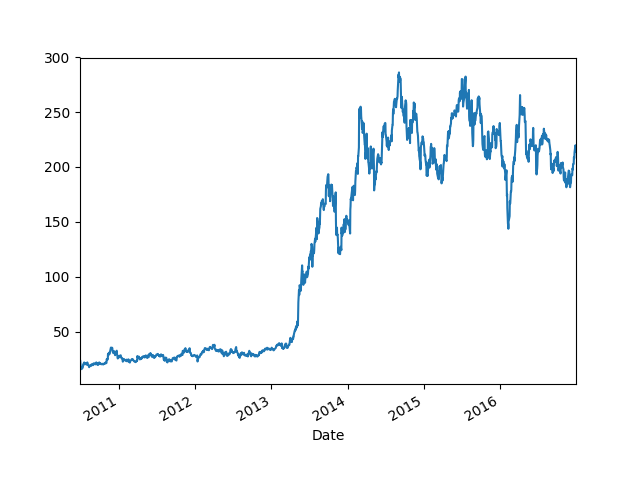

In [49]:
df['Adj Close'].plot()

In [50]:
df[['Open','High'] ].head()

,Open,High
Date,,
2010-06-29,19.000000,25.00
2010-06-30,25.790001,30.42
2010-07-01,25.000000,25.92
2010-07-02,23.000000,23.10
2010-07-06,20.000000,20.00


100ma this is going to be a 100 moving average
you don't know what a moving average is baically
there's number and then a moving average right
so 100 moving average let's say it takes today's
price which is a 1 price takes 99 of the prior days
prices creates an average of those that's today's
100 moving average we do the exact same thing tomorrow
and the next day and so on and so it's moving average it's 
just a way to kind of smooth out price over time and 
people will use them like when the 50 moving average crosses
over the 250 can signal an uptrend or downtrend in price 



In [51]:
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,NaN
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,NaN
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,NaN
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,NaN
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,NaN


In [52]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2016-12-23,208.000000,213.449997,207.710007,213.339996,213.339996,4662900,202.6190
2016-12-27,214.880005,222.250000,214.419998,219.529999,219.529999,5915700,202.5082
2016-12-28,221.529999,223.800003,217.199997,219.740005,219.740005,3782500,202.4053
2016-12-29,218.559998,219.199997,214.119995,214.679993,214.679993,4035900,202.2905
2016-12-30,216.300003,217.500000,211.679993,213.690002,213.690002,4642600,202.1366


In [53]:
df.dropna(inplace=True)

In [54]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2010-11-17,30.200001,30.750000,28.610001,29.490000,29.490000,750000,20.9879
2010-11-18,30.670000,30.740000,28.920000,29.889999,29.889999,956100,21.0479
2010-11-19,30.160000,31.370001,29.700001,30.990000,30.990000,1150500,21.1195
2010-11-22,31.570000,33.450001,31.500000,33.400002,33.400002,1529700,21.2339
2010-11-23,33.290001,35.680000,32.189999,34.570000,34.570000,1577800,21.3876


In [55]:
df = pd.read_csv('tsla.cvs',parse_dates=True,index_col=0)
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,23.860000
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,23.226666
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,22.220000
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,20.998000


<IPython.core.display.Javascript object>


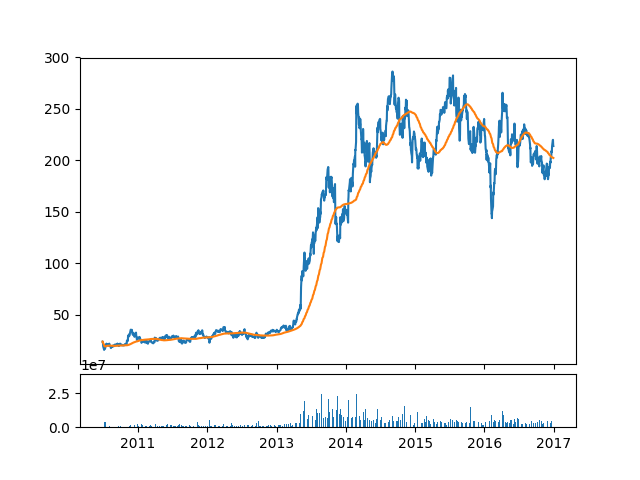

In [56]:
plt.figure()
ax1 = plt.subplot2grid( (6,1), (0,0),rowspan=5,colspan=1 )
ax2 = plt.subplot2grid( (6,1), (5,0),rowspan=1,colspan=1,sharex=ax1 )

ax1.plot(df.index,df["Adj Close"])
ax1.plot(df.index,df["100ma"])
ax2.bar(df.index,df["Volume"])

plt.show()